In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # warning not necessary for these visual/insightful tasks

## Load Data

In [3]:
path = "../data/"
artists = pd.read_csv(path+"artists.csv")
tracks = pd.read_csv(path+"tracks.csv")
# dict_artists = pd.read_json(path+"dict_artists.json") # probably won't use this data

FileNotFoundError: [Errno 2] No such file or directory: '../data/artists.csv'

# Trend of musical genres over the years 

In [3]:
def remove_apostrophes(string):
    string = string[1:-1]
    while string[0] in ["'", "\"", " "]:
        string = string[1:]
    return string

In [4]:
artists = artists[artists["genres"] != "[]"]

# The genres of a tracks are in string form '[genre1, genre2]' so they need to be mapped to a true list of string 
# before exploding into a single row for each genre
artists["genres"] =artists["genres"].apply(lambda x: x[1:-1].split(",")) # remove brackets and split genres
artists = artists.explode("genres")
artists["genres"] = artists["genres"].apply(lambda x: remove_apostrophes(x)) # remove apostrophes

In [5]:
artists

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,carnaval cadiz,Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,carnaval cadiz,Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,carnaval cadiz,Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,carnaval cadiz,Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,classical harp,Vera Dulova,3
...,...,...,...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,90087.0,teen pop,Brent Rivera,33
1104331,4fh2BIKYPFvXFsQLhaeVJp,309.0,la indie,Lone Kodiak,20
1104334,7akMsd2vb4xowNTehv3gsY,774.0,indie rockism,The Str!ke,0
1104336,35m7AJrUCtHYHyIUhCzmgi,205.0,indie rockism,Hunter Fraser,6


In [6]:
artists = artists.rename(columns={"id":"id_artists"})

In [7]:
artists.head(3)

,id_artists,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,carnaval cadiz,Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,carnaval cadiz,Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,carnaval cadiz,Los “Pofesionales”,7


In [8]:
# As for genres, the artists of a tracks are in string form '[artist1, artist2]' so they need to be mapped to a true list of string 
# before exploding into a single row for each artists
tracks["id_artists"] = tracks["id_artists"].apply(lambda x: x[1:-1].split(",")).explode("id_artists") # remove bracket and split artists
tracks["id_artists"] = tracks["id_artists"].apply(lambda x: remove_apostrophes(x)) # remove apostrophes

In [9]:
tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.445,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.263,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.177,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5


In [10]:
genres_years = tracks[["id", "id_artists", "release_date"]]
#genres_years["count"] = 1
genres_years = genres_years.merge(artists[["id_artists", "genres", "followers"]], on="id_artists")

In [11]:
genres_years["year"] = genres_years["release_date"].apply(lambda x: int(x[:4]))

In [12]:
temp = genres_years[["year", "genres", "followers"]].groupby(["year", "genres"]).sum()
temp = temp.sort_values(by=["year", "followers"]).reset_index()
result = pd.DataFrame()
for year in range(1922, 2022):
    df_year = temp[temp["year"] == year].iloc[-5:] # keep only 5 most popular genre per year
    result = pd.concat([result, df_year])

In [13]:
max_followers = result.groupby("year").max().reset_index()[["year", "followers"]].rename(columns={"followers":"max"})
result = result.merge(max_followers, on="year")
result.head()

,year,genres,followers,max
0,1922,merseybeat,79134461.0,87003972.0
1,1922,psychedelic rock,81870344.0,87003972.0
2,1922,british invasion,84080367.0,87003972.0
3,1922,rock,86555069.0,87003972.0
4,1922,classic rock,87003972.0,87003972.0


In [14]:
result["popularity"] = 100 * result["followers"] / result["max"]  # create a popularity score based on the relative number of followers for a genre compared to the max this year
result = result[["year", "genres", "popularity"]]
#result_f = result[["year", "genres", "followers"]] # to try also with followers

In [15]:
result.head(5)

,year,genres,popularity
0,1922,merseybeat,90.954998
1,1922,psychedelic rock,94.099548
2,1922,british invasion,96.639688
3,1922,rock,99.484043
4,1922,classic rock,100.000000


In [16]:
# remove genres that are represented only a few times :
most_frequent_genres = result.groupby("genres").count().reset_index()[["genres", "year"]].rename(columns={"year":"count"})\
                             .sort_values(by="count", ascending=False)
most_frequent_genres = most_frequent_genres[most_frequent_genres["count"] > 5]["genres"]
most_frequent_genres

24                pop
33               rock
19              latin
5        classic rock
8           dance pop
27      post-teen pop
31          reggaeton
39        trap latino
29                rap
0     adult standards
4        canadian pop
15            hip hop
6           classical
36               soul
Name: genres, dtype: object

In [17]:
result = result[result["genres"].isin(most_frequent_genres)]

In [18]:
final = result.pivot(index="year", columns="genres", values="popularity").fillna(0)

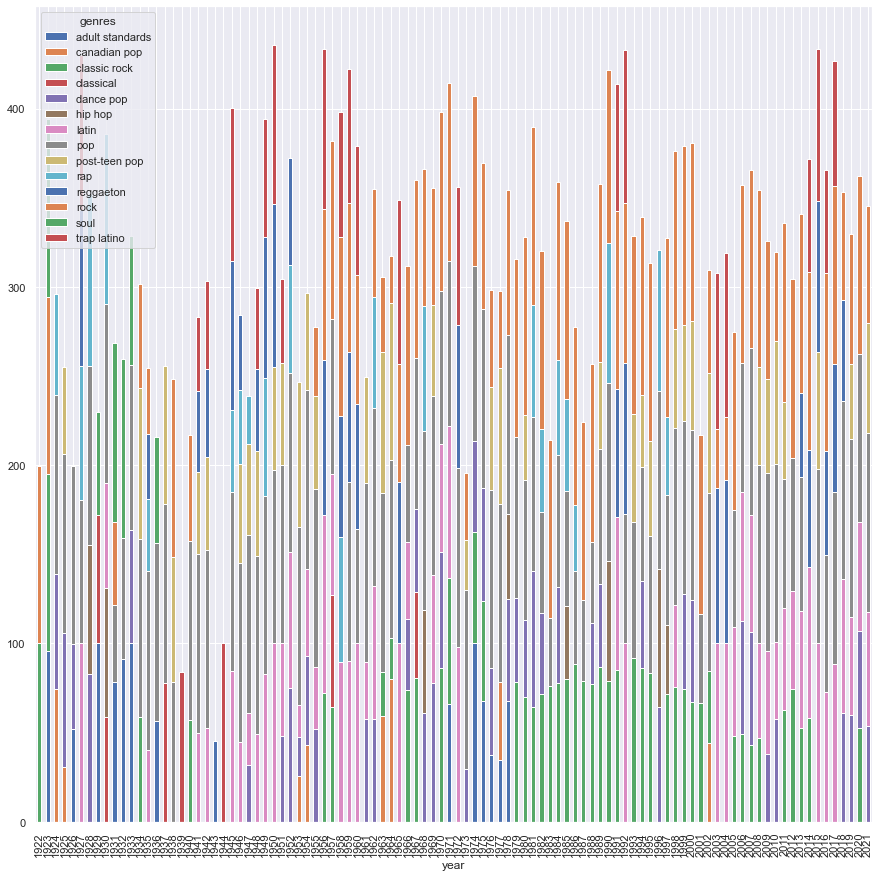

In [19]:
sns.set_theme()

final.plot(kind="bar", stacked=True, figsize=(15, 15))

In [22]:
final.head()

genres,adult standards,canadian pop,classic rock,classical,dance pop,hip hop,latin,pop,post-teen pop,rap,reggaeton,rock,soul,trap latino
year,,,,,,,,,,,,,,
1922,0.000000,0.000000,100.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,99.484043,0.0,0.0
1923,95.630165,0.000000,99.324599,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,99.324599,100.0,0.0
1924,0.000000,74.335635,0.000000,0.0,64.847391,0.0,0.0,100.0,0.000000,56.565252,0.0,0.000000,0.0,0.0
1925,0.000000,30.652620,0.000000,0.0,75.349207,0.0,0.0,100.0,49.172844,0.000000,0.0,0.000000,0.0,0.0
1926,52.254382,0.000000,0.000000,0.0,47.434624,0.0,0.0,100.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


## Try the same but grouping by decade

In [20]:
result_d = result.copy()

# Map to decade
result_d["year"] = result["year"].apply(lambda x: int(str(x)[:3] + "0"))
result_d = result_d.groupby(["year", "genres"]).mean().reset_index()
result_d.head(5)

,year,genres,popularity
0,1920,adult standards,82.628182
1,1920,canadian pop,52.494128
2,1920,classic rock,99.662300
3,1920,classical,71.915799
4,1920,dance pop,67.688229


In [21]:
final_d = result_d.pivot(index="year", columns="genres", values="popularity").fillna(0)

Text(0, 0.5, 'Popularity')

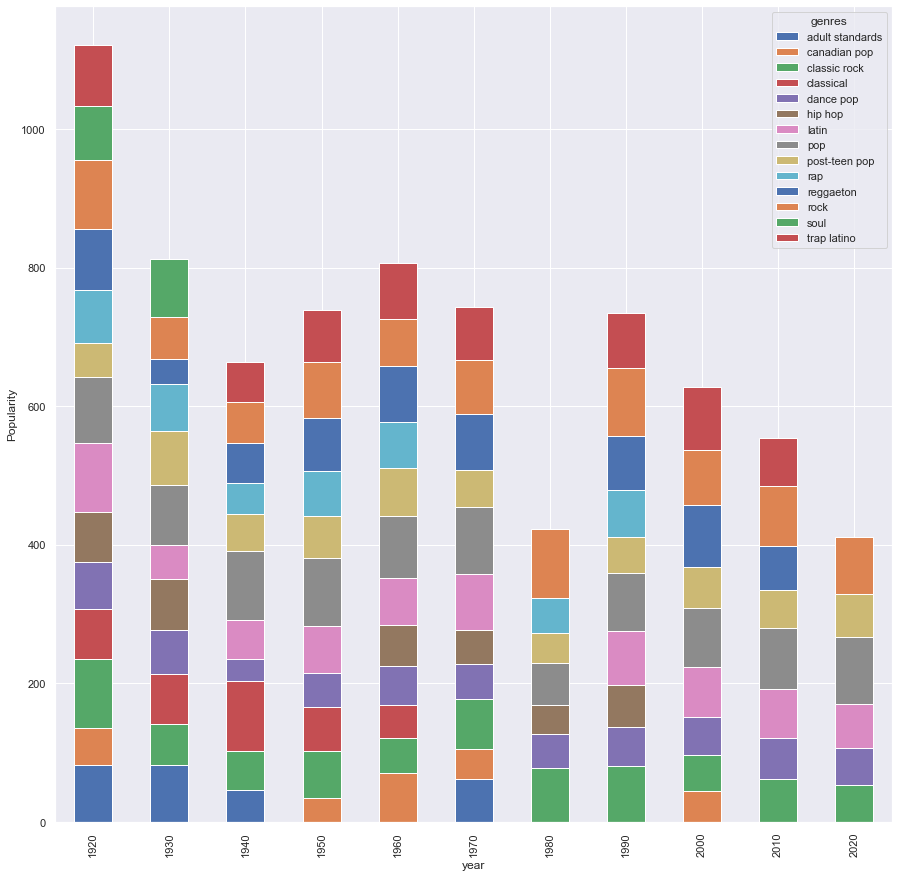

In [22]:
sns.set_theme()

final_d.plot(kind="bar", stacked=True, figsize=(15, 15))
plt.ylabel("Popularity")

#colors = sns.color_palette(n_colors=len(final_d.columns))
#for i, genre in enumerate(final_d.columns):
#    data = final_d[genre]
#    bar_plot = sns.barplot(x=final_d.index, y=data, color=colors[i])
#    #plt.legend(bar_plot, genre)

In [23]:
final_d["adult standards"].

SyntaxError: invalid syntax (<ipython-input-23-ff29df6ef4cd>, line 1)

In [67]:
final_c

,year,genres,id
6,1920,adult standards,572
15,1920,album rock,89
106,1920,british invasion,57
121,1920,canadian pop,9
177,1920,classic rock,175
...,...,...,...
27789,2020,rock,998
27967,2020,soft rock,462
27973,2020,soul,267
28167,2020,trap latino,386


In [56]:
final_c = genres_years.copy()
#final_c["year"] = final_c["year"].apply(lambda x: int(str(x)[:3] + "0"))

In [57]:
final_c.head(5)

,id,id_artists,release_date,genres,followers,year
0,07A5yehtSnoedViJAZkNnc,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,tango,3528.0,1922
1,07A5yehtSnoedViJAZkNnc,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,vintage tango,3528.0,1922
2,08FmqUhxtyLTn6pAh6bk45,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,tango,3528.0,1922
3,08FmqUhxtyLTn6pAh6bk45,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,vintage tango,3528.0,1922
4,0JV4iqw2lSKJaHBQZ0e5zK,5LiOoJbxVSAMkBS2fUm3X2,1922-03-29,tango,3528.0,1922


In [58]:
final_c = final_c.groupby(["year", "genres"]).count()["id"].reset_index()
final_c = final_c[final_c["genres"].isin(most_frequent_genres)]


In [59]:
total = final_c.groupby("year")["id"].sum().reset_index()
#ids = final_c[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()

In [60]:
final_c

,year,genres,id
3,1922,adult standards,60
42,1922,classic rock,17
48,1922,classical,2
55,1922,dance pop,1
112,1922,pop,2
...,...,...,...
132501,2021,rap,138
132531,2021,reggaeton,180
132541,2021,rock,394
132670,2021,soul,67


In [61]:
test = pd.DataFrame()
final_c["id"] = final_c["id"].astype(float)

#for i, row in zip(final_c.index, final_c.iterrows()):
#    final_c.at[i, "id"] = (row[1]["id"] / total[total["year"] == row[1]["year"]]["id"]).iloc[0]


In [62]:
final_c

,year,genres,id
3,1922,adult standards,60.0
42,1922,classic rock,17.0
48,1922,classical,2.0
55,1922,dance pop,1.0
112,1922,pop,2.0
...,...,...,...
132501,2021,rap,138.0
132531,2021,reggaeton,180.0
132541,2021,rock,394.0
132670,2021,soul,67.0


In [63]:
final_c = final_c.pivot(index="year", columns="genres", values="id").fillna(0)
final_c

genres,adult standards,canadian pop,classic rock,classical,dance pop,hip hop,latin,pop,post-teen pop,rap,reggaeton,rock,soul,trap latino
year,,,,,,,,,,,,,,
1922,60.0,0.0,17.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,14.0,12.0,0.0
1923,43.0,0.0,9.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,48.0,0.0
1924,20.0,2.0,16.0,5.0,6.0,2.0,4.0,9.0,3.0,3.0,1.0,17.0,26.0,1.0
1925,52.0,2.0,14.0,6.0,12.0,4.0,0.0,12.0,7.0,5.0,0.0,12.0,26.0,0.0
1926,190.0,0.0,46.0,7.0,14.0,10.0,7.0,21.0,8.0,14.0,2.0,36.0,61.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,197.0,24.0,367.0,201.0,260.0,185.0,426.0,248.0,126.0,195.0,201.0,629.0,124.0,239.0
2018,258.0,42.0,357.0,284.0,379.0,217.0,434.0,358.0,182.0,211.0,224.0,549.0,130.0,263.0
2019,377.0,32.0,270.0,297.0,354.0,224.0,345.0,285.0,126.0,218.0,157.0,489.0,166.0,177.0


In [64]:
final_c.to_csv("genres_years.csv", header=True)

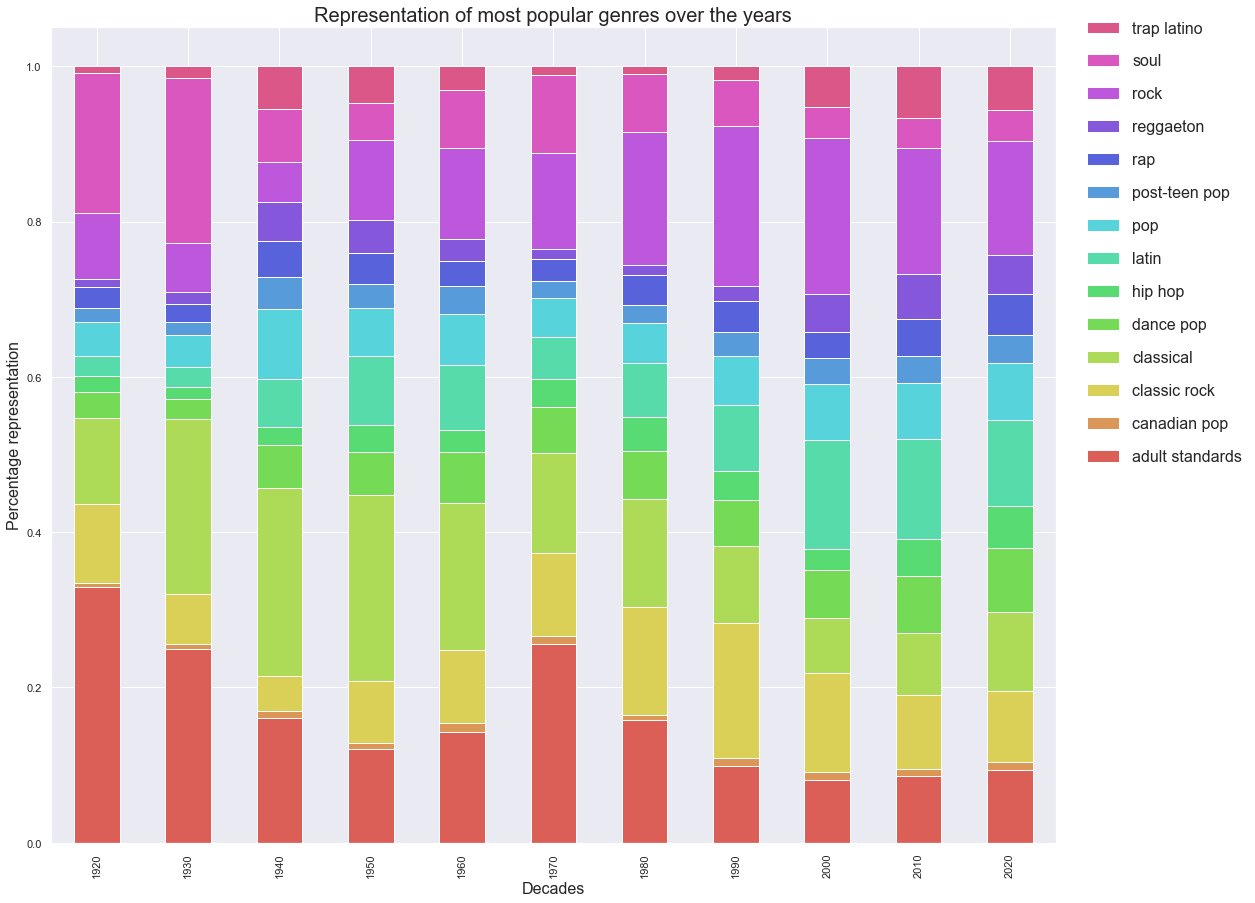

In [234]:
sns.set_theme(palette=sns.color_palette("hls", 14))

final_c.plot(kind="bar", stacked=True, figsize=(18, 15))
plt.title("Representation of most popular genres over the years", fontdict={"fontsize": 20})
plt.ylabel("Percentage representation", fontdict={"fontsize": 16})
plt.xlabel("Decades", fontdict={"fontsize": 16})

plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.5), fontsize=16, labelspacing=-3, frameon=False)